
**Métricas de qualidade de imagem**


In [0]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.pyplot import imread
import numpy as np
import math
from skimage import measure
import seaborn as sns

In [0]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

def add_noise(sigma, bw_img):
    """Adiciona ruído a uma imagem em escala de cinza com valores entre 0 e 1"""
    sh = bw_img.shape
    noise = np.random.normal(0, sigma, sh)
    newgray = bw_img + noise
    #np.clip(newgray, 0, 1) # quando faço isso ela deixa de ser normal!!!
    return newgray

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#im = imread("/content/gdrive/My Drive/Colab_Notebooks/autumn-goodman.jpg") # 3648 x 5472
im = imread("/content/gdrive/My Drive/Colab_Notebooks/apple.jpg") # 900 x 900
#im = imread("/content/gdrive/My Drive/Colab_Notebooks/blackhole.jpg") # 225 x 225
#im = imread("/content/gdrive/My Drive/Colab_Notebooks/petermcnamee.jpg") # 256 x 256

In [0]:
gray = rgb2gray(im)    
gray = gray/np.amax(gray)

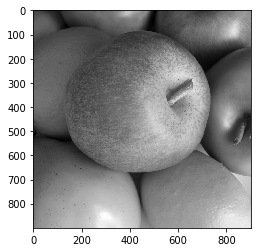

In [37]:
plt.imshow(gray, cmap = 'gray')

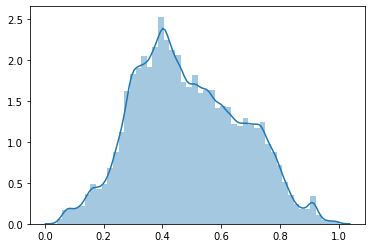

In [38]:
sns.distplot(gray.flatten())

In [20]:
len(gray[0])

225

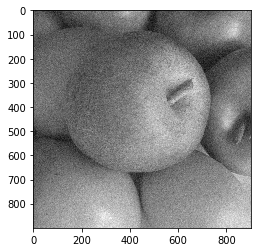

In [39]:
x = add_noise(0.05, gray)
plt.imshow(x, cmap='gray')

https://kite.com/python/docs/skimage.measure.compare_ssim

In [0]:
measure.compare_ssim(gray, x, full = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  """Entry point for launching an IPython kernel.


(0.6359007489740887,
 array([[0.68855309, 0.73294952, 0.71548916, ..., 0.58760312, 0.57319396,
         0.54610675],
        [0.73150387, 0.7769076 , 0.74772641, ..., 0.58883675, 0.5746511 ,
         0.54118117],
        [0.71039923, 0.74740073, 0.7488691 , ..., 0.61034819, 0.58870926,
         0.5708561 ],
        ...,
        [0.58173179, 0.62747245, 0.66197989, ..., 0.64486296, 0.64523209,
         0.63360709],
        [0.63870952, 0.66227299, 0.70003607, ..., 0.67369826, 0.68328493,
         0.63789965],
        [0.65599034, 0.67460253, 0.70259888, ..., 0.66902445, 0.69076203,
         0.63441214]]))

o primeiro valor que sai é o valor médio pra imagem inteira, e depois sai o valor do ssim para cada pixel.
plot do valor do ssim para cada pixel.
um valor mais alto do ssim significa que está melhor.
e nesse plot os valores mais altos estão exatamente na definição da mulher.

In [42]:
ssim = measure.compare_ssim(gray, x, full = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  """Entry point for launching an IPython kernel.


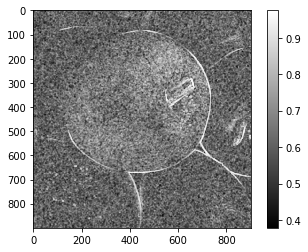

In [43]:
plt.imshow(ssim[1], cmap = 'gray')
plt.colorbar()

essa metrica, quando calculada pixel a pixel, mostra o que " sobra" de diferença entre a imagem original e 

In [44]:
ssim[0]

0.6358939407649717

ValueError: ignored

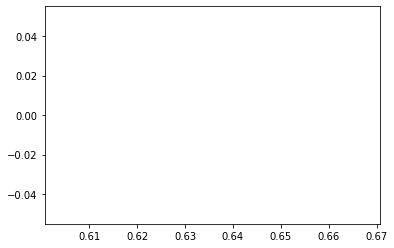

In [48]:
sns.distplot(ssim[1])

In [0]:
x2 = add_noise(0.5, gray)
ssim2 = measure.compare_ssim(gray, x2, full = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  


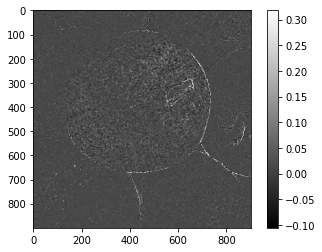

In [0]:
plt.imshow(ssim2[1], cmap = 'gray')
plt.colorbar()

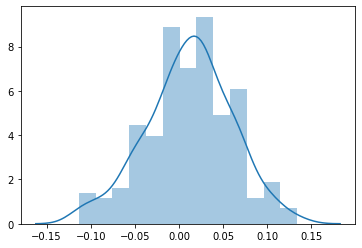

In [9]:
sns.distplot(x[0])

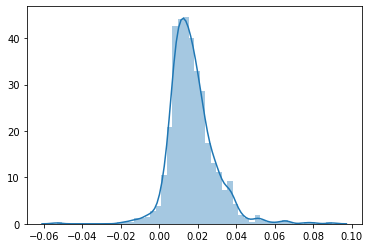

In [0]:
sns.distplot(ssim2[1][0]) # que que eu to plotando?

In [0]:
ssim

(0.6359007489740887,
 array([[0.68855309, 0.73294952, 0.71548916, ..., 0.58760312, 0.57319396,
         0.54610675],
        [0.73150387, 0.7769076 , 0.74772641, ..., 0.58883675, 0.5746511 ,
         0.54118117],
        [0.71039923, 0.74740073, 0.7488691 , ..., 0.61034819, 0.58870926,
         0.5708561 ],
        ...,
        [0.58173179, 0.62747245, 0.66197989, ..., 0.64486296, 0.64523209,
         0.63360709],
        [0.63870952, 0.66227299, 0.70003607, ..., 0.67369826, 0.68328493,
         0.63789965],
        [0.65599034, 0.67460253, 0.70259888, ..., 0.66902445, 0.69076203,
         0.63441214]]))

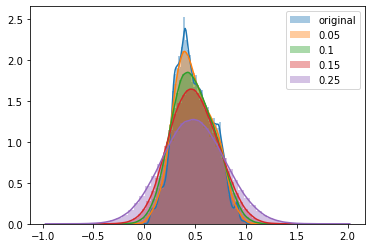

In [40]:
sns.distplot(gray.flatten(), label = 'original')
sns.distplot(add_noise(0.05, gray).flatten(), label = '0.05')
sns.distplot(add_noise(0.1, gray).flatten(), label = '0.1')
sns.distplot(add_noise(0.15, gray).flatten(), label = '0.15')
sns.distplot(add_noise(0.25, gray).flatten(), label = '0.25')
plt.legend()

Nessa imagem fica claro que, conforme eu vou adicionando cada vez mais um ruído que é gaussiano, a imagem fica com os pixels cada vez distribuidos mais normalmente - modulo da curtose abaixa, assimetria diminui, etc

# Distribution on lfw_faces data

In [4]:
### Imports

from sklearn.datasets import fetch_lfw_people
from matplotlib import pyplot as plt
from matplotlib.pyplot import imread
import numpy as np
import seaborn as sns
import scipy

import keras
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Dropout
from keras.models import Model
from sklearn.model_selection import train_test_split
from keras import metrics # https://keras.io/metrics/ - ver a parte de custom metrics
from keras.callbacks import History 
from keras.utils.vis_utils import plot_model

import tensorflow as tf

### Funções minhas

# Adicionando ruído às imagens
def add_noise(sigma, bw_img):
    """Adiciona ruído a uma imagem em escala de cinza com valores entre 0 e 1"""
    sh = bw_img.shape
    noise = np.random.normal(0, sigma, sh)
    newgray = bw_img + noise
    #np.clip(newgray, 0, 1) # quando faço isso ela deixa de ser normal!!!
    # vou parar de clipar.
    return newgray

def plot_original_reconstructed(pred, numero):
    figures, axes = plt.subplots(1, 3)
    axes[0].imshow(faces[numero].reshape(60, 44), cmap = 'gray')
    axes[0].set_title('Original image')
    axes[1].imshow(newfaces[numero].reshape(60, 44), cmap = 'gray')
    axes[1].set_title('Input (noisy image)')
    axes[2].imshow(pred[numero].reshape(60, 44), cmap = 'gray')
    axes[2].set_title('Reconstructed')

def plot_compare(idx, original, noisy, predicted):
    figures, axes = plt.subplots(1, 3)
    axes[0].imshow(original[idx].reshape(60, 44), cmap = 'gray')
    axes[0].set_title('Original image')
    axes[1].imshow(noisy[idx].reshape(60, 44), cmap = 'gray')
    axes[1].set_title('Input (noisy image)')
    axes[2].imshow(predicted[idx].reshape(60, 44), cmap = 'gray')
    axes[2].set_title('Reconstructed')

## Funcao custo customizada: SSIM

def ssim_loss(y_true, y_pred):
  return -tf.reduce_mean(tf.image.ssim(y_true, y_pred, 1.0))

Using TensorFlow backend.


In [81]:
### Base de dados
db = fetch_lfw_people()

faces = db['data']
total_imagens = len(faces)
faces_matrix = np.empty((total_imagens, 60, 44))

for i in range(total_imagens):
    faces_matrix[i] = faces[i].reshape(62, 47)[1:61, 1:45]

# Normalizando imagens
faces_matrix = faces_matrix/np.amax(faces_matrix)

# Adicionando ruído de sd = 0.05
del faces
faces = faces_matrix
noisyfaces = add_noise(0.05, faces)

## Train and test split

treino, teste, noisytreino, noisyteste = train_test_split(faces_matrix, noisyfaces, test_size = 0.2, random_state = 1)

noisytreino = noisytreino.reshape(-1, 60, 44, 1)
treino = treino.reshape(-1, 60, 44, 1)

noisyteste = noisyteste.reshape(-1, 60, 44, 1)
teste = teste.reshape(-1, 60, 44, 1)

In [88]:
data = treino.copy()
looprange = range(data.shape[0])
x = np.zeros(data.shape[0])

for i in looprange:
    x[i] = np.mean(data[i])

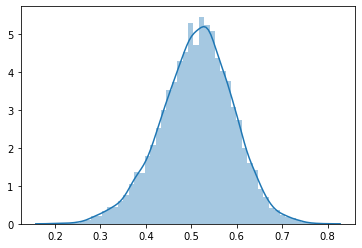

In [89]:
sns.distplot(x, label = 'Variance in test set')

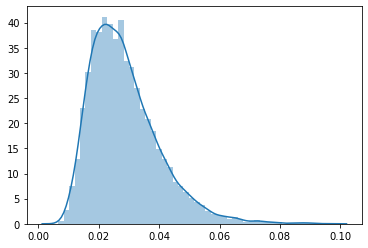

In [43]:
sns.distplot(x, label = 'Variance in training set (noisy)')
